In [1]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [2]:
bn = gum.fastBN(
    f'TinderBaby<-Voorwaarden aanwezig;'
    f'Voorwaarden aanwezig<-Vruchtbaarheid;'
    f'Voorwaarden aanwezig<-Kinderwens allebei;'
    f'Voorwaarden aanwezig<-Relatie via Tinder;'
    f'Op Tinder->Relatie via Tinder<-Goede match;'
    f'Vruchtbaarheid<-Vrouw ouder dan 35;'
    f'Kinderwens vrouw->Kinderwens allebei<-Kinderwens man')   
bn

(pyAgrum.BayesNet<double>@00000176AD10F8E0) BN{nodes: 10, arcs: 9, domainSize: 1024, dim: 25, mem: 400o}

In [3]:
bn.cpt('Goede match').fillWith([0.8,0.2])

(pyAgrum.Potential<double>@00000176AC8BEB70) 
  Goede match      |
0        |1        |
---------|---------|
 0.8000  | 0.2000  |

In [4]:
bn.cpt('Op Tinder').fillWith([0.7,0.3])

(pyAgrum.Potential<double>@00000176AC8BEA30) 
  Op Tinder        |
0        |1        |
---------|---------|
 0.7000  | 0.3000  |

In [5]:
bn.cpt('Kinderwens man').fillWith([0.1,0.9])

(pyAgrum.Potential<double>@00000176AC8BEC90) 
  Kinderwens man   |
0        |1        |
---------|---------|
 0.1000  | 0.9000  |

In [6]:
bn.cpt('Kinderwens vrouw').fillWith([0.1,0.9])

(pyAgrum.Potential<double>@00000176AC8BE970) 
  Kinderwens vrouw |
0        |1        |
---------|---------|
 0.1000  | 0.9000  |

In [7]:
bn.cpt('Vrouw ouder dan 35').fillWith([0.55,0.45])

(pyAgrum.Potential<double>@00000176AC8BECF0) 
  Vrouw ouder dan 3|
0        |1        |
---------|---------|
 0.5500  | 0.4500  |

In [8]:
bn.cpt('Relatie via Tinder')[{'Op Tinder': 0, 'Goede match': 0}] = [1, 0]
bn.cpt('Relatie via Tinder')[{'Op Tinder': 0, 'Goede match': 1}] = [1, 0]
bn.cpt('Relatie via Tinder')[{'Op Tinder': 1, 'Goede match': 0}] = [1, 0]
bn.cpt('Relatie via Tinder')[{'Op Tinder': 1, 'Goede match': 1}] = [0, 1]
bn.cpt('Relatie via Tinder')

(pyAgrum.Potential<double>@00000176AC8BEE50) 
             ||  Relatie via Tinde|
Op Tin|Goede ||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 1.0000  | 0.0000  |
0     |1     || 1.0000  | 0.0000  |
1     |1     || 0.0000  | 1.0000  |

In [9]:
bn.cpt('Kinderwens allebei')[{'Kinderwens man': 0, 'Kinderwens vrouw': 0}] = [1, 0]
bn.cpt('Kinderwens allebei')[{'Kinderwens man': 0, 'Kinderwens vrouw': 1}] = [1, 0]
bn.cpt('Kinderwens allebei')[{'Kinderwens man': 1, 'Kinderwens vrouw': 0}] = [1, 0]
bn.cpt('Kinderwens allebei')[{'Kinderwens man': 1, 'Kinderwens vrouw': 1}] = [0, 1]
bn.cpt('Kinderwens allebei')

(pyAgrum.Potential<double>@00000176AC8BED70) 
             ||  Kinderwens allebe|
Kinder|Kinder||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 1.0000  | 0.0000  |
0     |1     || 1.0000  | 0.0000  |
1     |1     || 0.0000  | 1.0000  |

In [10]:
bn.cpt('Vruchtbaarheid')[{'Vrouw ouder dan 35': 0}] = [0.1, 0.9]
bn.cpt('Vruchtbaarheid')[{'Vrouw ouder dan 35': 1}] = [0.2, 0.8]
bn.cpt('Vruchtbaarheid')

(pyAgrum.Potential<double>@00000176AC8BEEF0) 
      ||  Vruchtbaarheid   |
Vrouw ||0        |1        |
------||---------|---------|
0     || 0.1000  | 0.9000  |
1     || 0.2000  | 0.8000  |

In [11]:
bn.cpt('Voorwaarden aanwezig')[{'Relatie via Tinder': 0, 'Kinderwens allebei': 0, 'Vruchtbaarheid': 0}] = [1, 0]
bn.cpt('Voorwaarden aanwezig')[{'Relatie via Tinder': 0, 'Kinderwens allebei': 0, 'Vruchtbaarheid': 1}] = [1, 0]
bn.cpt('Voorwaarden aanwezig')[{'Relatie via Tinder': 0, 'Kinderwens allebei': 1, 'Vruchtbaarheid': 0}] = [1, 0]
bn.cpt('Voorwaarden aanwezig')[{'Relatie via Tinder': 0, 'Kinderwens allebei': 1, 'Vruchtbaarheid': 1}] = [1, 0]
bn.cpt('Voorwaarden aanwezig')[{'Relatie via Tinder': 1, 'Kinderwens allebei': 0, 'Vruchtbaarheid': 0}] = [1, 0]
bn.cpt('Voorwaarden aanwezig')[{'Relatie via Tinder': 1, 'Kinderwens allebei': 0, 'Vruchtbaarheid': 1}] = [1, 0]
bn.cpt('Voorwaarden aanwezig')[{'Relatie via Tinder': 1, 'Kinderwens allebei': 1, 'Vruchtbaarheid': 0}] = [1, 0]
bn.cpt('Voorwaarden aanwezig')[{'Relatie via Tinder': 1, 'Kinderwens allebei': 1, 'Vruchtbaarheid': 1}] = [0, 1]
bn.cpt('Voorwaarden aanwezig')

(pyAgrum.Potential<double>@00000176AC8BEDD0) 
                    ||  Voorwaarden aanwe|
Vrucht|Kinder|Relati||0        |1        |
------|------|------||---------|---------|
0     |0     |0     || 1.0000  | 0.0000  |
1     |0     |0     || 1.0000  | 0.0000  |
0     |1     |0     || 1.0000  | 0.0000  |
1     |1     |0     || 1.0000  | 0.0000  |
0     |0     |1     || 1.0000  | 0.0000  |
1     |0     |1     || 1.0000  | 0.0000  |
0     |1     |1     || 1.0000  | 0.0000  |
1     |1     |1     || 0.0000  | 1.0000  |

In [12]:
bn.cpt('TinderBaby')[{'Voorwaarden aanwezig': 0,}] = [0.95, 0.05]
bn.cpt('TinderBaby')[{'Voorwaarden aanwezig': 1,}] = [0.1, 0.9]
bn.cpt('TinderBaby')

(pyAgrum.Potential<double>@00000176AC8BEE90) 
      ||  TinderBaby       |
Voorwa||0        |1        |
------||---------|---------|
0     || 0.9500  | 0.0500  |
1     || 0.1000  | 0.9000  |

In [13]:
ie=gum.LazyPropagation(bn)

In [14]:
ie.makeInference()
print (ie.posterior('TinderBaby'))


  TinderBaby       |
0        |1        |
---------|---------|
 0.9147  | 0.0853  |



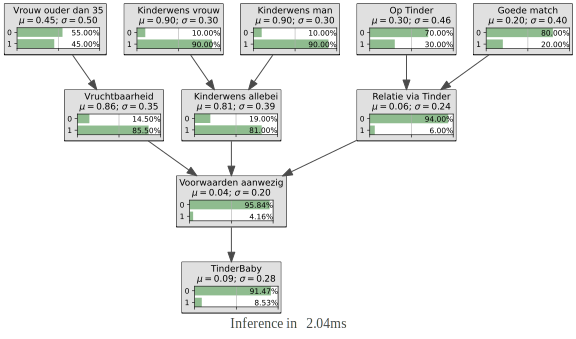

In [15]:
gnb.showInference(bn,evs={})

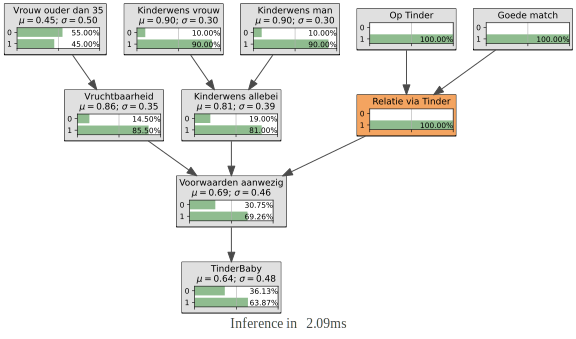

In [16]:
gnb.showInference(bn,evs={'Relatie via Tinder':1})

In [17]:
ie.setEvidence({'Relatie via Tinder': 1})
ie.makeInference()
print (ie.posterior('TinderBaby'))


  TinderBaby       |
0        |1        |
---------|---------|
 0.3613  | 0.6387  |



In [18]:
ie.eraseAllEvidence()
ie.setEvidence({'Kinderwens allebei': 1})
ie.makeInference()
print (ie.posterior('TinderBaby'))


  TinderBaby       |
0        |1        |
---------|---------|
 0.9064  | 0.0936  |



In [19]:
ie.eraseAllEvidence()
ie.setEvidence({'Vrouw ouder dan 35':1})
ie.makeInference()
print (ie.posterior('TinderBaby'))


  TinderBaby       |
0        |1        |
---------|---------|
 0.9170  | 0.0830  |



In [20]:
ie.eraseAllEvidence()
ie.setEvidence({'Vruchtbaarheid': 1, 'Kinderwens allebei': 1, 'Relatie via Tinder': 1})
ie.makeInference()
print (ie.posterior('TinderBaby'))


  TinderBaby       |
0        |1        |
---------|---------|
 0.1000  | 0.9000  |

